In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [134]:
#data_68 = pd.read_table('reno_confidence_region_68.csv', delim_whitespace=True)
#data_95 = pd.read_table('reno_confidence_region_95.csv', delim_whitespace=True)
#data_99 = pd.read_table('reno_confidence_region_99.csv', delim_whitespace=True)
data_RENO = pd.read_table('reno_data_cal_python.csv', delim_whitespace=True)
ji_min=data_RENO['ji'].min()
#ji_min
data_RENO['ji']=data_RENO['ji']-ji_min

In [142]:
#data_68 = 
#data_95 = ((data_RENO['ji'] <= 6.18) & (data_RENO['ji'] >= 6.13))
#data_99 = ((data_RENO['ji'] <= 11.83) & (data_RENO['ji'] >= 11.78))

data_68=data_RENO[(data_RENO['ji'] <= 2.3) & (data_RENO['ji'] >= 2.25)]
data_95=data_RENO[(data_RENO['ji'] <= 6.18) & (data_RENO['ji'] >= 6.10)]
data_99=data_RENO[((data_RENO['ji'] <= 11.83) & (data_RENO['ji'] >= 11.71))]

In [143]:
data_68=data_68[['s22t13','dmee']]
data_95=data_95[['s22t13','dmee']]
data_99=data_99[['s22t13','dmee']]


In [144]:
data_cl68 = pd.read_table('reno2018_cl68.csv', delim_whitespace=True)
data_cl95 = pd.read_table('reno2018_cl95.csv', delim_whitespace=True)
data_cl99 = pd.read_table('reno2018_cl99.csv', delim_whitespace=True)

In [145]:
x_68=data_68['s22t13'].to_numpy()
y_68=data_68['dmee'].to_numpy()

x_95=data_95['s22t13'].to_numpy()
y_95=data_95['dmee'].to_numpy()

x_99=data_99['s22t13'].to_numpy()
y_99=data_99['dmee'].to_numpy()


x_cl68=data_cl68['s22t13'].to_numpy()
y_cl68=data_cl68['dmee'].to_numpy()

x_cl95=data_cl95['s22t13'].to_numpy()
y_cl95=data_cl95['dmee'].to_numpy()

x_cl99=data_cl99['s22t13'].to_numpy()
y_cl99=data_cl99['dmee'].to_numpy()

In [146]:
len(x_68), len(y_68),len(x_95), len(y_95),len(x_99), len(y_99)

(639, 639, 1065, 1065, 1661, 1661)

In [147]:
len(x_cl68), len(y_cl68),len(x_cl95), len(y_cl95),len(x_cl99), len(y_cl99)

(1612, 1612, 1100, 1100, 588, 588)

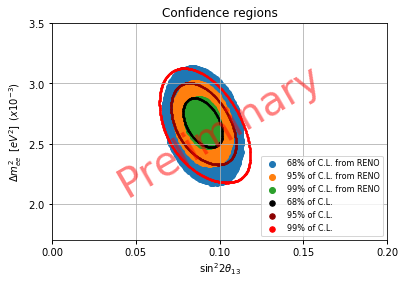

In [221]:
fig, ax = plt.subplots()

#ax.scatter(x, y, s, c)#, marker=verts)
#ax.plot(x_99, y_99,x_95, y_95,x_68, y_68,x_cl99, y_cl99,x_cl95, y_cl95,x_cl68, y_cl68)

ax.scatter(x_cl68, y_cl68,label='68% of C.L. from RENO')
ax.scatter(x_cl95, y_cl95,label='95% of C.L. from RENO')
ax.scatter(x_cl99, y_cl99,label='99% of C.L. from RENO') # RENO DATA
ax.scatter(x_68, y_68,s=0.5,c='black',label='68% of C.L.') # MY RENO DATA
ax.scatter(x_95, y_95,s=0.5,c='darkred',  label='95% of C.L.')
ax.scatter(x_99, y_99,s=0.5,c='red', label='99% of C.L.')


ax.text(0.5, 0.5, 'Preliminary', transform=ax.transAxes,fontsize=40, color='red', alpha=0.5,ha='center', va='center', rotation='30')
ax.set_xlim(0.00, 0.2)
ax.set_ylim(0.0017, 0.0035)

ax.set_xticks([0,0.05,0.1,0.15,0.2])
ax.set_yticks([0.002,0.0025,0.0030,0.0035])

ax.set_yticklabels(['$2.0$','$2.5$','$3.0$','$3.5$'])

lgnd=ax.legend()

# Plot legend.
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=8)
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$',
       title='Confidence regions')
ax.grid(True, linestyle='-')
ax.tick_params(labelcolor='black', labelsize=10, width=1)
#fig.savefig("test.eps")
fig.savefig("test.svg")
plt.show()


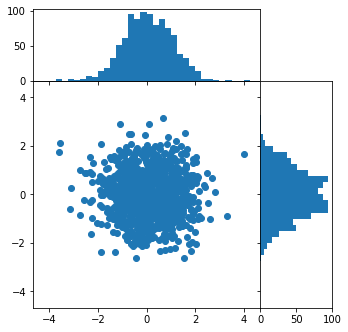

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, ax = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1., pad=0.0, sharex=ax)
ax_histy = divider.append_axes("right", 1., pad=0.0, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

ax_histx.set_yticks([0, 50, 100])
ax_histy.set_xticks([0, 50, 100])

plt.show()

No handles with labels found to put in legend.


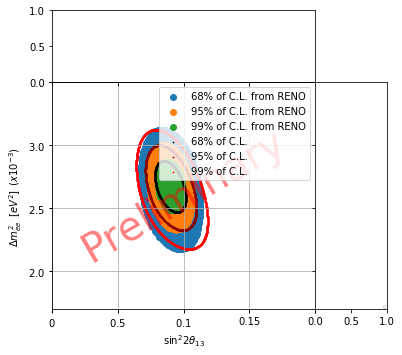

In [220]:
fig, ax = plt.subplots(figsize=(6, 5.5))
# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.0, pad=0.0, sharex=ax)
ax_histy = divider.append_axes("right", 1.0, pad=0.0, sharey=ax)
# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax.scatter(x_cl68, y_cl68,label='68% of C.L. from RENO')
ax.scatter(x_cl95, y_cl95,label='95% of C.L. from RENO')
ax.scatter(x_cl99, y_cl99,label='99% of C.L. from RENO') # RENO DATA
ax.scatter(x_68, y_68,s=0.5,c='black',label='68% of C.L.') # MY RENO DATA
ax.scatter(x_95, y_95,s=0.5,c='darkred',  label='95% of C.L.')
ax.scatter(x_99, y_99,s=0.5,c='red', label='99% of C.L.')


ax.text(0.5, 0.5, 'Preliminary', transform=ax.transAxes,fontsize=40, color='red', alpha=0.5,ha='center', va='center', rotation='30')
ax.set_xlim(0.00, 0.2)
ax.set_ylim(0.0017, 0.0035)

ax.set_xticks([0,0.05,0.1,0.15,0.2])
ax.set_yticks([0.002,0.0025,0.0030,0.0035])

ax.set_xticklabels(['$0$','$0.5$','$0.1$','0.15',''])
ax.set_yticklabels(['$2.0$','$2.5$','$3.0$',''])


lgnd=ax.legend()

# Plot legend.
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=3)
#lgnd.legendHandles[3]._sizes = [30]
#lgnd.legendHandles[4]._sizes = [30]
#lgnd.legendHandles[5]._sizes = [30]

ax.set(xlabel=r'$\sin^2 2\theta_{13}$', ylabel=r'$\Delta m^2_{ee} \hspace{0.5} [eV^{2}] \hspace{0.5} (x10^{-3})$',
       title='Confidence regions')
ax.grid(True, linestyle='-')
ax.tick_params(labelcolor='black', labelsize=10, width=1)
#fig.savefig("test.eps")
fig.savefig("test.svg")
plt.show()